### Translation

In [1]:
import cv2 as cv
import numpy as np

In [5]:
image = cv.imread("../DATA/colors.jpg")
cv.imshow("Original", image)
cv.waitKey(0)

32

In [6]:
M = np.float32([
  [1, 0, 25],
  [0, 1, 50]
])

shifted = cv.warpAffine(image, M, (image.shape[1], image.shape[0]))
cv.imshow("Shifted down and right", shifted)
cv.waitKey(0)

13

In [7]:
M = np.float32([
  [1, 0, -25],
  [0, 1, -50]
])

shifted = cv.warpAffine(image, M, (image.shape[1], image.shape[0]))
cv.imshow("Shifted up and left", shifted)
cv.waitKey(0)

13

In [8]:
def translate_image(image, x, y):
  M = np.float32([[1, 0, x], [0, 1, y]])
  shifted = cv.warpAffine(image, M, (image.shape[1], image.shape[0]))
  return shifted

In [9]:
shifted = translate_image(image, -50, 90)
cv.imshow("Shifted", shifted)
cv.waitKey(0)

13

In [50]:
cv.destroyAllWindows()

### Rotation

In [11]:
image.shape

(540, 720, 3)

In [15]:
(h, w) = image.shape[:2]
center = w//2 , h//2
M = cv.getRotationMatrix2D(center, 45, .5)
rotated = cv.warpAffine(image, M, (w, h))
cv.imshow("Rotated by 45 degress", rotated)
cv.waitKey(0)

32

In [16]:
# function rotation
def rotate_image(image, angle, scale):
  (h, w) = image.shape[:2]
  center = w//2 , h//2
  M = cv.getRotationMatrix2D(center, angle, scale)
  rotated = cv.warpAffine(image, M, (w, h))
  return rotated

In [18]:
rotated = rotate_image(image, 45, .5)
cv.imshow("Rotated by 45 degress", rotated)
cv.waitKey(0)

13

### Resizing

In [23]:
h = image.shape[0]
w = image.shape[1]
r = 50.0 / h
print(r)
dim = (int(w*r), 50) # (h,w)
resized = cv.resize(image, dim, interpolation=cv.INTER_AREA)
cv.imshow("Resized (Height)", resized)
cv.waitKey(0)

0.09259259259259259


32

In [1]:
import imutils

In [27]:
resized = imutils.resize(image, width = 100)
cv.imshow("Resized with Imtuils", resized)
cv.waitKey(0)

13

### Flipping

In [28]:
flipped = cv.flip(image, 1)
cv.imshow("Flip horizontaly", flipped)
cv.waitKey(0)

13

In [30]:
flipped = cv.flip(image, 0)
cv.imshow("Flip vertically", flipped)
cv.waitKey(0)

32

In [31]:
flipped = cv.flip(image, -1)
cv.imshow("Flip horizontaly and vertically", flipped)
cv.waitKey(0)

13

### Cropping

In [34]:
cropped = image[30:120, 240:335]
cv.imshow("Cropped", cropped)
cv.waitKey(0)

13

### Arithmetics

In [ ]:
M = np.ones(image.shape, dtype="uint8") * 50
substracted = cv.subtract(image, M)
cv.imshow("Subtracted", substracted)
cv.waitKey(0)

13

In [39]:
rectangle = np.zeros((300, 300), dtype="uint8")
cv.rectangle(rectangle, (25, 25), (275, 275), 255, -1)
cv.imshow("Rectangle", rectangle)

circle = np.zeros((300, 300), dtype="uint8")
cv.circle(circle, (150, 150), 150 , 255, -1)
cv.imshow("Circle", circle)

cv.waitKey(0)

32

### Bitwise Operations

In [40]:
bitwiseAnd = cv.bitwise_and(rectangle, circle)
cv.imshow("And", bitwiseAnd)
cv.waitKey(0)

13

In [ ]:
"""

rectangle = [1, 1, 0]
circle = [0, 1, 1]
and = [0, 1, 0]

"""

In [41]:
bitwiseOr = cv.bitwise_or(rectangle, circle)
cv.imshow("Or", bitwiseOr)
cv.waitKey(0)

32

In [42]:
bitwiseXOr = cv.bitwise_xor(rectangle, circle)
cv.imshow("XOr", bitwiseXOr)
cv.waitKey(0)

13

In [43]:
bitwiseNot = cv.bitwise_not(rectangle, circle)
cv.imshow("Not", bitwiseNot)
cv.waitKey(0)

13

### Masking

In [45]:
mask = np.zeros(image.shape[:2], dtype="uint8")
(cX, cY) = image.shape[1] // 2, image.shape[0] // 2
cv.rectangle(mask, (cX - 75, cY - 75), (cX + 75, cY + 75), 255, -1)
cv.imshow("Mask", mask)
cv.waitKey(0)

32

In [46]:
masked_image = cv.bitwise_and(image, image, mask=mask)
cv.imshow("Masked image", masked_image)
cv.waitKey(0)

32

### Color Spaces

In [47]:
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
cv.imshow("Gray", gray)

hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)
cv.imshow("HSV", hsv)

lab = cv.cvtColor(image, cv.COLOR_BGR2LAB)
cv.imshow("L*a*b*", lab)

cv.waitKey(0)

13

### Histograms

In [49]:
import matplotlib.pyplot as plt
image = cv.imread("../DATA/grayscale_image.jpg")
image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
cv.imshow("Gray image", image)
cv.waitKey(0)

13

In [58]:
cv.destroyAllWindows()

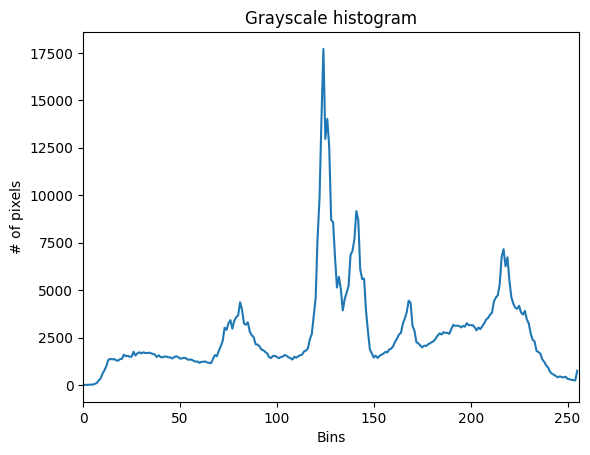

In [52]:
hist = cv.calcHist([image], [0], None, [256], [0, 256])
plt.figure()
plt.title("Grayscale histogram")
plt.xlabel("Bins")
plt.ylabel("# of pixels")
plt.plot(hist)
plt.xlim([0, 256])
plt.show()

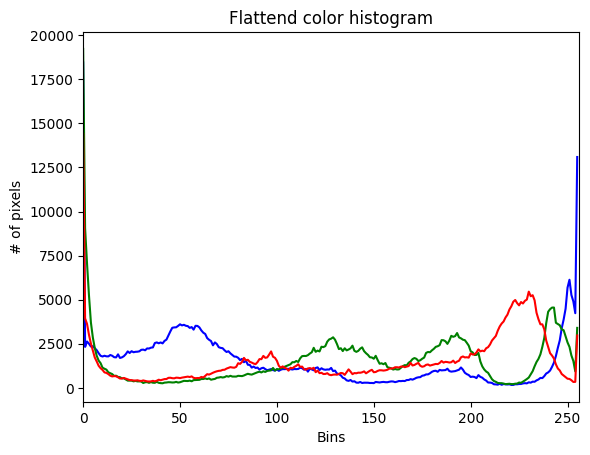

In [55]:
image = cv.imread("../DATA/colors.jpg")
chans = cv.split(image)
colors = ("b", "g", "r")
plt.figure()
plt.title("Flattend color histogram")
plt.xlabel("Bins")
plt.ylabel("# of pixels")

for (chan, color) in zip(chans, colors):
  hist = cv.calcHist([chan], [0], None, [256], [0, 256])
  plt.plot(hist, color=color)
  plt.xlim([0, 256])

### Smoothing and bluring

In [56]:
image = cv.imread("../DATA/colors.jpg")
blurred = np.hstack(
  [
    cv.blur(image, (3, 3)),
    cv.blur(image, (5, 5)),
    cv.blur(image, (7, 7))
  ]
)
cv.imshow("Blurred", blurred)
cv.waitKey(0)

13

In [57]:
image = cv.imread("../DATA/colors.jpg")
blurred = np.hstack(
  [
    cv.GaussianBlur(image, (3, 3), sigmaX=0),
    cv.GaussianBlur(image, (5, 5), sigmaX=0),
    cv.GaussianBlur(image, (7, 7), sigmaX=0)
  ]
)
cv.imshow("GaussianBlur", blurred)
cv.waitKey(0)

32

In [59]:
image = cv.imread("../DATA/colors.jpg")
blurred = np.hstack(
  [
    cv.medianBlur(image, 3),
    cv.medianBlur(image, 5),
    cv.medianBlur(image, 7)
  ]
)
cv.imshow("MedianBlur", blurred)
cv.waitKey(0)

32